# \[TS\] CH01. 실습

김보람  
2023-09-17

> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# TS기본

## 예시1

In [3]:
x <- 1:10

In [4]:
class(x)

In [5]:
x <- ts(1:10)

In [6]:
class(x)

In [11]:
x <- ts(rnorm(50), start=c(2000,1), frequency=12)   

-   start=c(2000,1) 은 2000년도 1월부터 시작, frequency=12로 설정하면
    월별 데이터

-   frequency=4로 하면 분기별로

-   frequency=52로 하면 주별로

-   frequency=1로 하면 1년

In [14]:
x

In [15]:
cycle(x) #주기

`-` 주기

-   분해법 같은 거 할 때 주기가 설명변수로 들어갈 때가 있다.

In [13]:
class(cycle(x))

In [16]:
time(x)

## 예시2

In [33]:
x <- rnorm(100)

In [34]:
class(x)

In [35]:
t <- 1:100

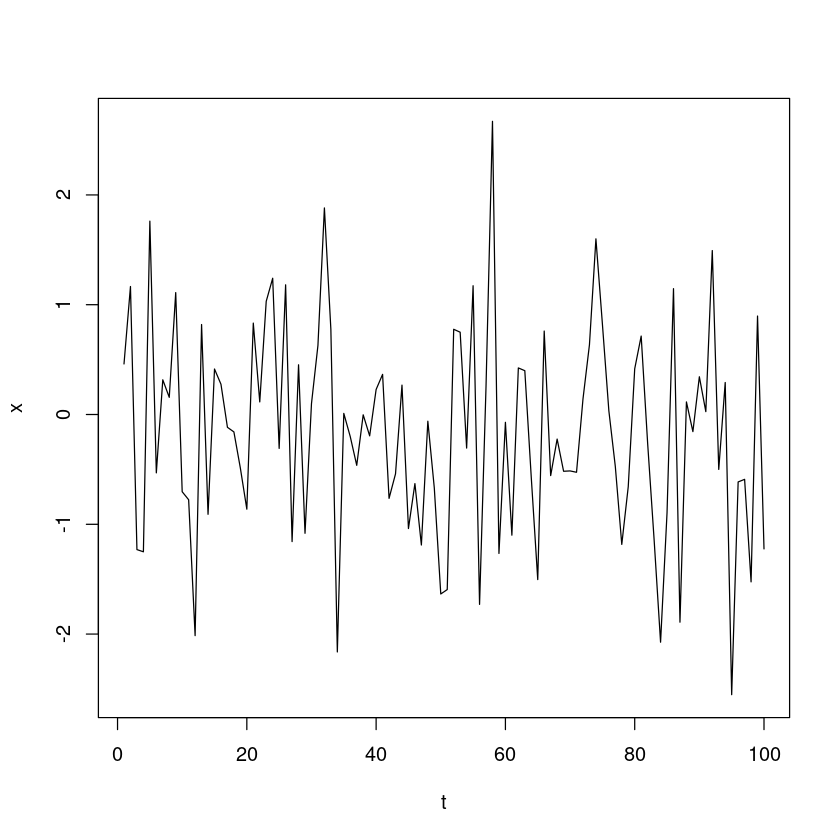

In [40]:
plot(t,x, type='l')

-   type=‘l’ 하면 선으로 그려짐

In [41]:
y <- as.ts(x)

In [42]:
class(y)

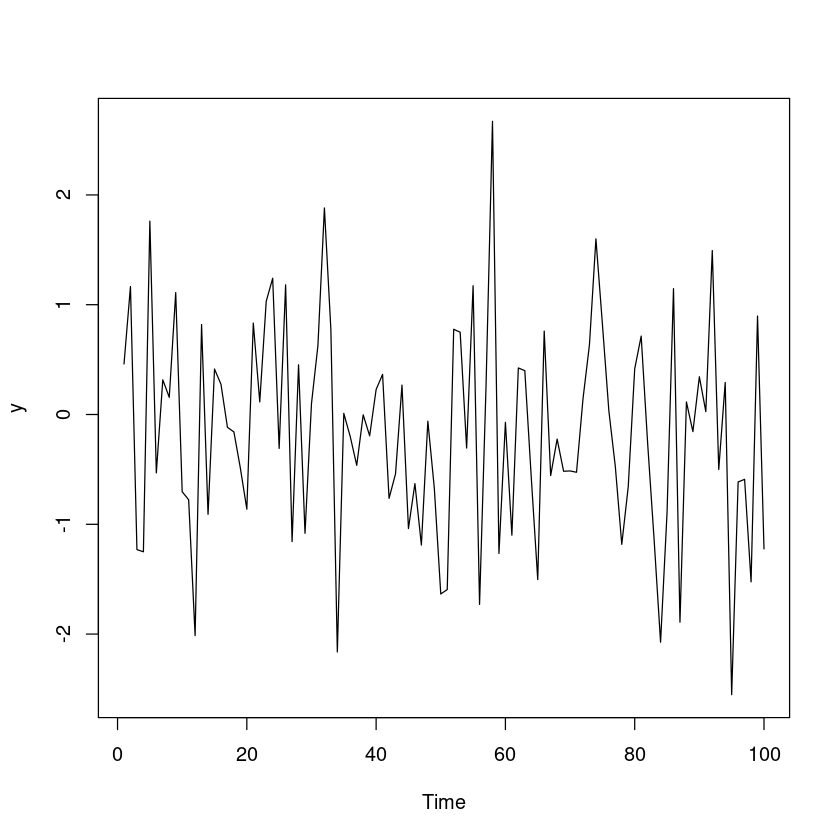

In [43]:
plot(y)

-   y를 ts로 바꿔준 후 plot그리면 바로 선으로 그려짐

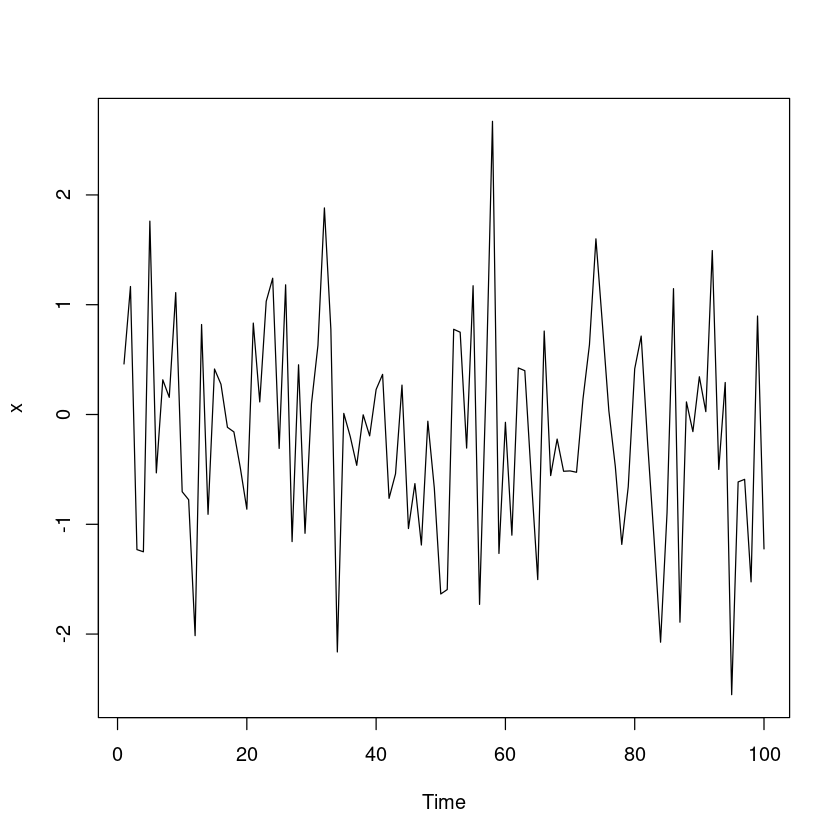

In [44]:
plot.ts(x)

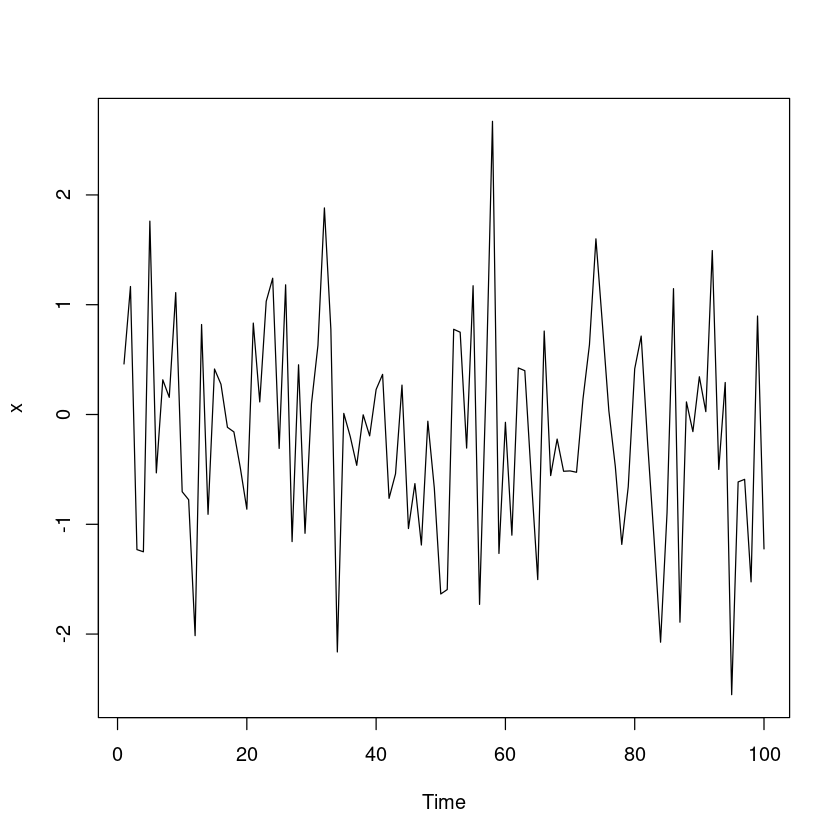

In [45]:
ts.plot(x)

## 예시3

In [49]:
z <- ts(matrix(rnorm(300), 100, 3), start=c(2000), frequency=12)

In [50]:
z

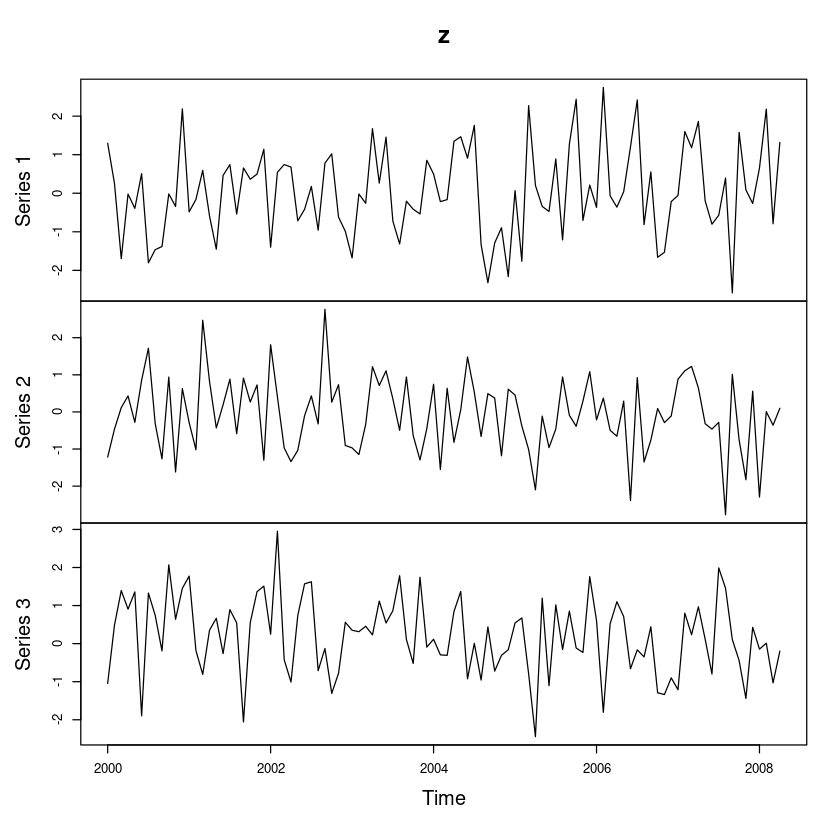

In [51]:
plot(z)

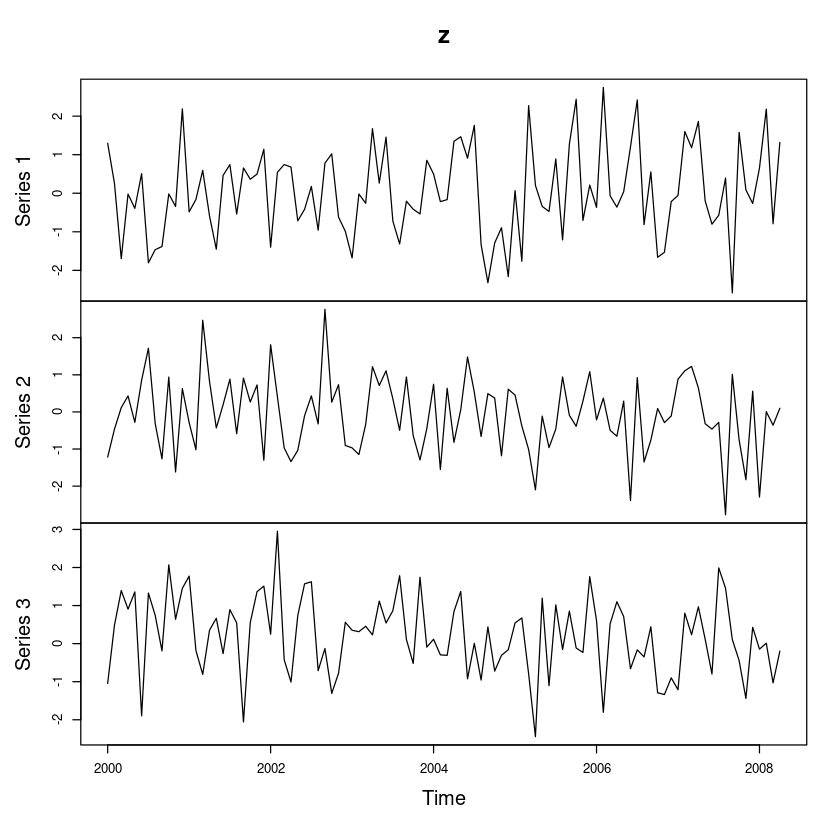

In [53]:
plot.ts(z)

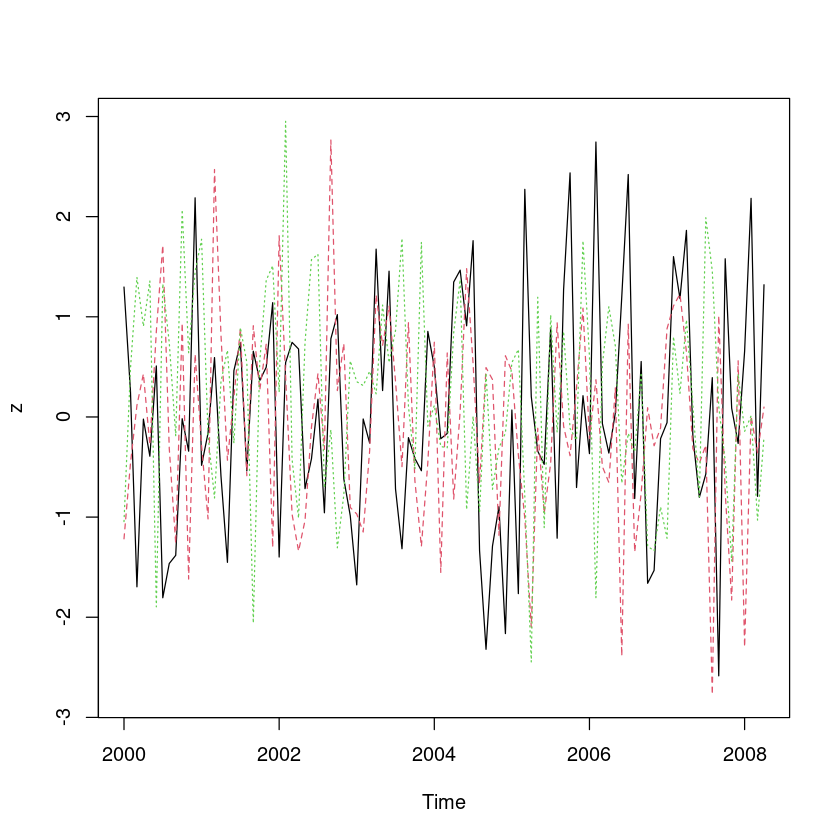

In [54]:
plot.ts(z, plot.type="single", col=1:3, lty=1:3)

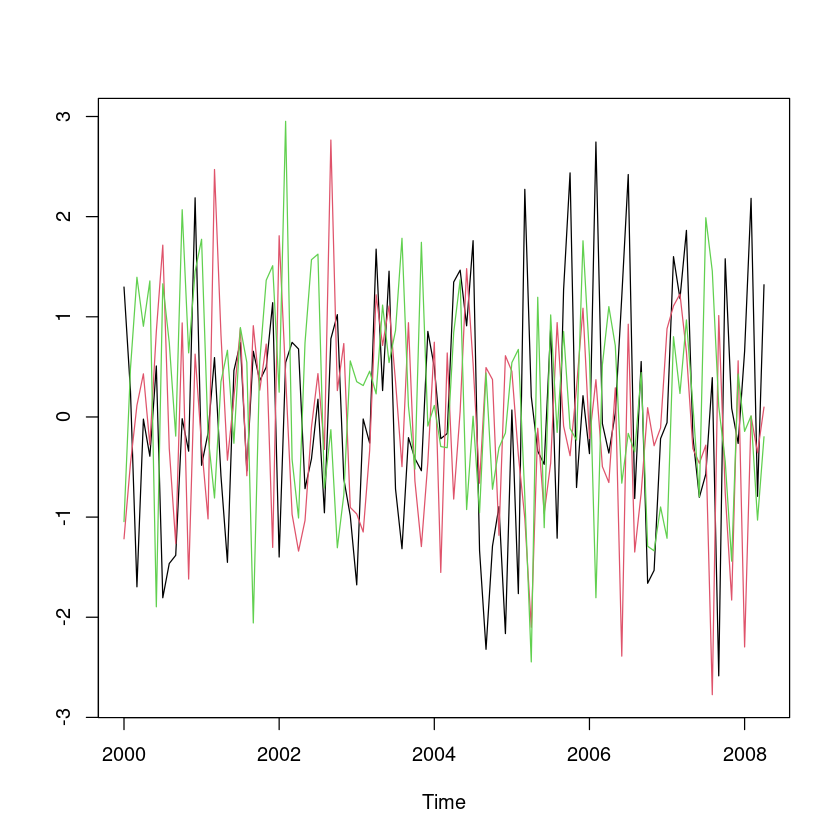

In [55]:
ts.plot(z, col=1:3)

## 예시4: iris 데이터

In [56]:
head(iris)

In [57]:
t.iris <- as.ts(iris[,-5])

-   마지막 자료는 범주형 자료라서 빼줌

In [58]:
class(t.iris)

-   mts: multiple time series

In [60]:
t.iris[10,3]

-   matrix에 사용하는 모든 함수 같은걸 사용할 수 있다.

In [62]:
head(t.iris)

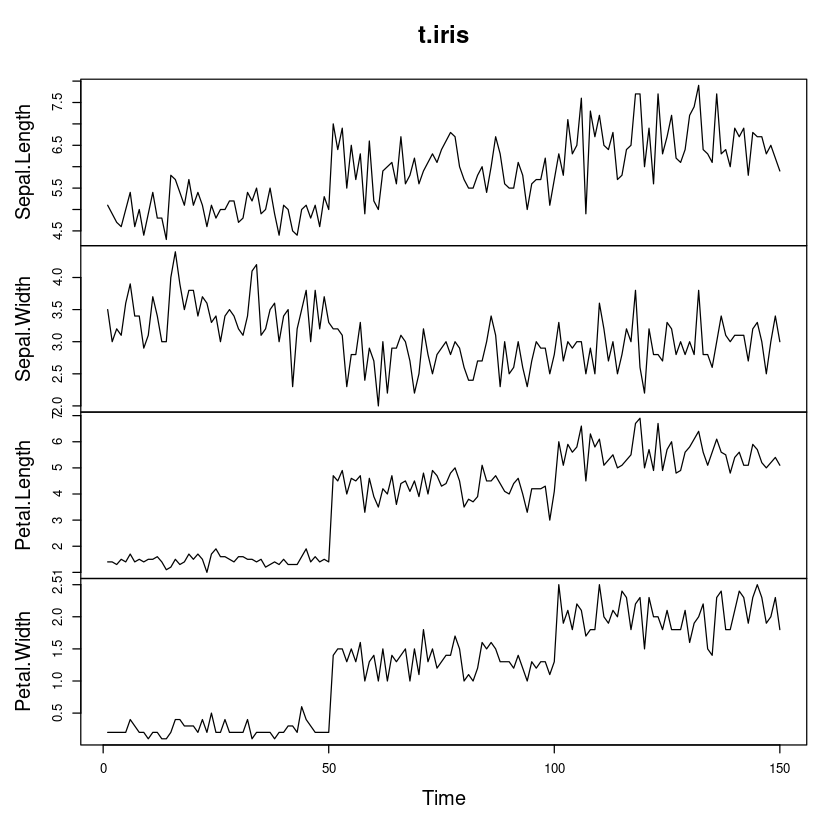

In [63]:
plot.ts(t.iris)

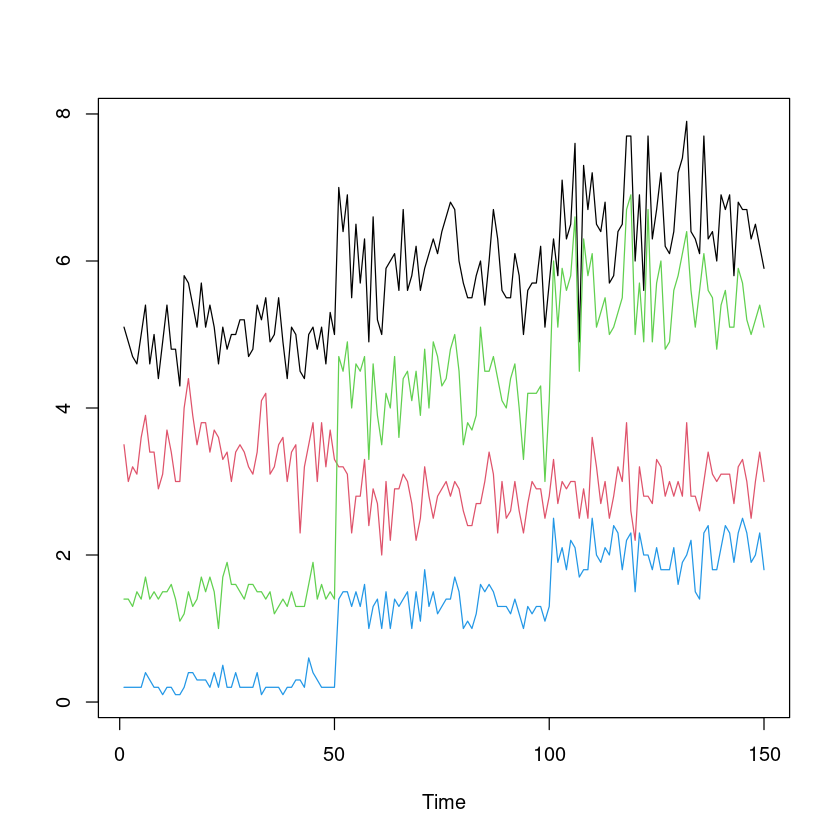

In [64]:
ts.plot(t.iris, col=1:4)

# Date

$r_{t,3M} = \frac{y_{t+3M}}{y_t}-1$

3개월 후의 수익률을 구한다 =

In [66]:
Sys.Date()

-   현재 날짜 불러옴

In [74]:
date()

-   현재 날짜와 시간

In [67]:
a <- Sys.Date()

In [68]:
class(a)

In [69]:
a <- "2023-09-17"
a

In [70]:
class(a)

In [72]:
a_date <- as.Date(a)

In [73]:
a_date

-   따옴표가 사라짐!

In [75]:
class(a_date)

In [76]:
a <- as.Date(c("2023-09-17","2024-01-01"))
a

In [77]:
a[2] - a[1]

In [78]:
a_chr <- as.character(a)

In [79]:
a_chr

In [80]:
a_chr[2] - a_chr[1]

-   문자라 안됨

In [81]:
a[1] + 7

In [82]:
a[1] - 7

In [83]:
a[1]

In [84]:
format(a[1], format="%B-%d-%y")

In [85]:
as.Date("2023-09-17")

In [92]:
b <- as.Date("09/17/23", format="%m/%d/%y")

-   `as.Date("09/17/23")` 로 하면 09년으로 파악할 수도 있으므로 위에처럼
    format형식을 지정해주는 것이 좋다.

In [93]:
b

In [95]:
weekdays(b)

In [99]:
# ?Date

In [97]:
# ?format

In [98]:
# ?as.Date

# Lubridate package 활용하기

In [100]:
install.packages("lubridate")

Installing package into ‘/home/coco/R/x86_64-pc-linux-gnu-library/4.2’
(as ‘lib’ is unspecified)

Warning message in install.packages("lubridate"):
“installation of package ‘lubridate’ had non-zero exit status”

In [101]:
library(lubridate)


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



## 날짜, 시간 정보를 추출

In [102]:
a <- today()

In [103]:
a

In [105]:
class(a)

In [106]:
year(a)

In [107]:
month(a)

In [109]:
day(a)

In [110]:
wday(a)

-   기본세팅 1:일요일, 2: 월요일 …

In [111]:
wday(a, label=TRUE)

In [133]:
class(wday(a,label=TRUE))

In [112]:
now()

In [113]:
class(now())

In [114]:
now <- now()

In [115]:
hour(now)

In [116]:
minute(now)

In [117]:
second(now)

In [118]:
ymd("2023-09-17")

-   ymd: year month day

In [119]:
mdy("09-17-23")

In [120]:
ymd(20230917)

In [139]:
ymd("2023 Sep 17") # locale="USA")

-   뒤에 locale 하면 안되넹

In [122]:
ymd("2023/09/17")

In [123]:
a <- ymd_hms("2023-09-17 09:00:00", tz="Asia/Seoul")

-   hms: 시간

In [140]:
 ymd_hms("2023-09-17 09:00:00")

In [141]:
ymd_hms("2023-09-17 09:00:00", tz="Asia/Seoul")

In [124]:
a

In [126]:
with_tz(a, tz="America/New_York")

-   tz: time zone

-   한국은 현재 9.17. 인데 미국은 9. 16.일수도 있음. 미국을 9. 17.로
    바꾸어버리면 한국 기준으로 미국의 데이터는 미래 데이터인 경우가
    있다! 그러므로 time zone을 생각해야함!!ㅡ

-   설명변수에 미래변수가 있으면 안된다.

In [127]:
ym(202309)

In [128]:
hms("11:30:00")

In [129]:
hm("11:30")

In [130]:
now <- now()

In [131]:
now

In [132]:
update(now, years=2000)

-   필요한 날짜만 변경